In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = './archive/256_ObjectCategories'

In [4]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_rotate=0,max_lighting=0.3, max_zoom=1.01)

In [5]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=tfms,
                                  size=128,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

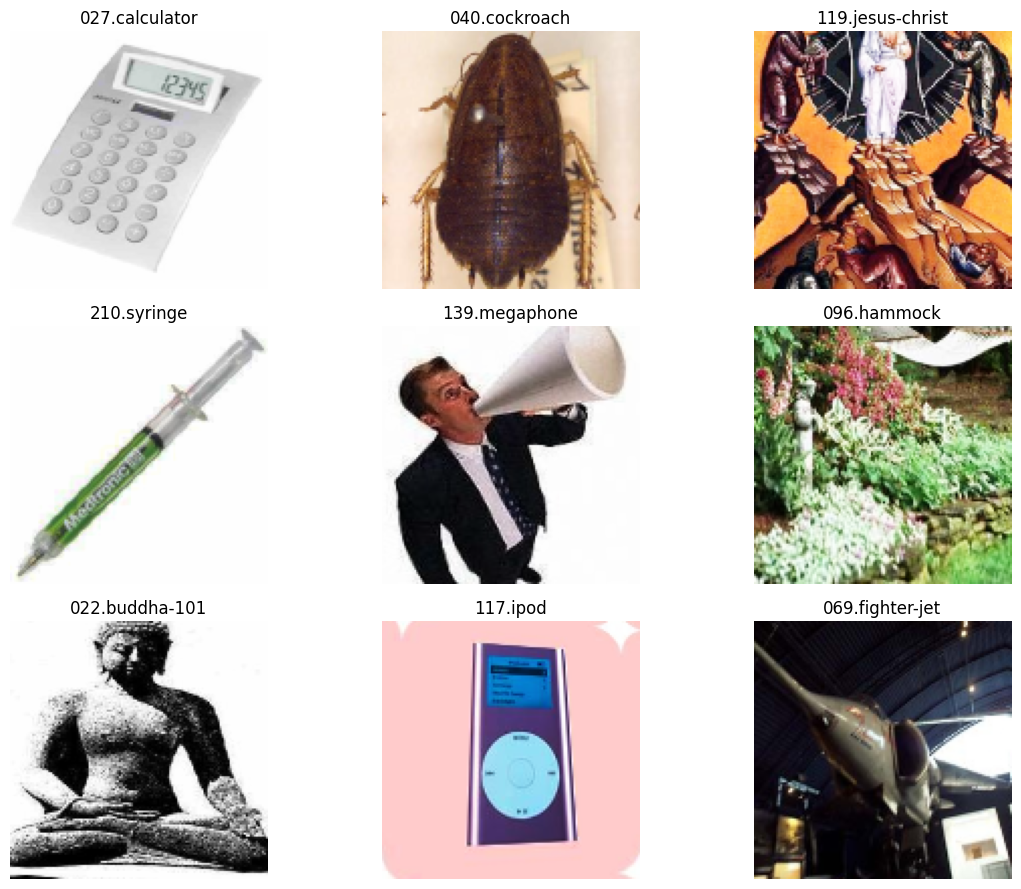

In [6]:
data.show_batch(rows=3, figsize=(12,9))

In [7]:
arch = models.resnet50

In [8]:
learn = cnn_learner(data, arch, metrics=accuracy, model_dir="/tmp/model/")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


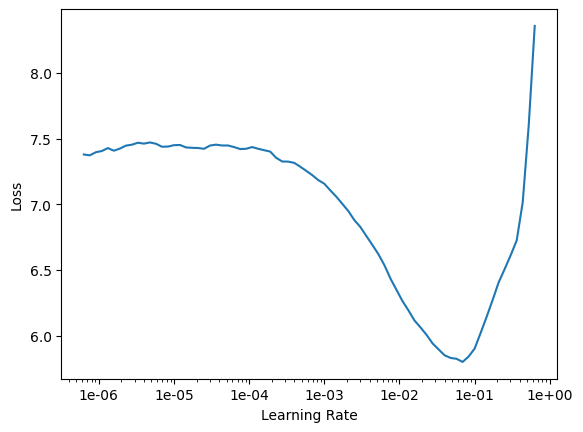

In [9]:
learn.lr_find()


learn.recorder.plot()

In [10]:
lr = 1e-01/2

In [11]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.305913,2.019426,0.563960,40:27
1,3.299872,2.385282,0.504166,37:35
2,2.332079,1.702005,0.627022,40:05


KeyboardInterrupt: 

In [ ]:
# learn.save('stage1')

In [ ]:
# data = ImageDataBunch.from_folder(path, train=".", 
#                                   valid_pct=0.2,
#                                   ds_tfms=tfms,
#                                   size=224,bs=64, 
#                                   num_workers=0).normalize(imagenet_stats)

In [ ]:
# learn.data = data
# data.train_ds[0][0].shape

In [ ]:
# learn.freeze()

In [ ]:
# learn.lr_find()
# learn.recorder.plot()

In [ ]:
# lr = 1e-3/3

In [ ]:
# learn.fit_one_cycle(5, slice(lr))

In [ ]:
img = data.train_ds[0][0]

In [ ]:
learn.predict(img)